## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/preprocessed_data.csv')

#### Show Top 5 Records

In [3]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,log_price,model_year_milage,brand_model_year,brand_milage,fuel_type_milage,brand_clean_title_missing,fuel_type_clean_title_missing,accident_clean_title_missing,brand_fuel_type,accident_clean_title
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,9.239899,102663000,Ford_2013,Ford_51000,E85 Flex Fuel_51000,Ford_0,E85 Flex Fuel_0,At least 1 accident or damage reported_0,Ford_E85 Flex Fuel,At least 1 accident or damage reported_Yes
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,10.545473,70213582,Hyundai_2021,Hyundai_34742,Gasoline_34742,Hyundai_0,Gasoline_0,At least 1 accident or damage reported_0,Hyundai_Gasoline,At least 1 accident or damage reported_Yes
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,10.907753,45236184,Lexus_2022,Lexus_22372,Gasoline_22372,Lexus_1,Gasoline_1,None reported_1,Lexus_Gasoline,None reported_Unknown
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,9.648595,179133500,INFINITI_2015,INFINITI_88900,Hybrid_88900,INFINITI_0,Hybrid_0,None reported_0,INFINITI_Hybrid,None reported_Yes
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,10.463075,19876535,Audi_2021,Audi_9835,Gasoline_9835,Audi_1,Gasoline_1,None reported_1,Audi_Gasoline,None reported_Unknown


In [4]:
# Define target variable
target = 'log_price'

In [5]:
#select features
features = [col for col in df.columns if col != target]

In [6]:
X = df[features]
y = df[target]

In [7]:
# Split numerical and categorical features
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [8]:
#preprocessor
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

In [9]:
preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer,  cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Evaluate Function
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [13]:
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [14]:
model_list = []
r2_list = []

In [15]:
# Train and Evaluate Models
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0001
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8217
- Mean Absolute Error: 0.2243
- R2 Score: 0.1330


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.8417
- Mean Absolute Error: 0.6567
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8825
- Mean Absolute Error: 0.6649
- R2 Score: -0.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0467
- Mean Absolute Error: 0.0325
- R2 Score: 0.9969
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8123
- Mean Absolute Error: 0.2236
- R2 Score: 0.1527


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2919
- Mean Absolute Error: 0.2120
- R2 Score: 0.8797
----------------------

                Model Name  R2_Score
4            Decision Tree  0.994496
5  Random Forest Regressor  0.993153
6             XGBRegressor  0.988705
7    CatBoosting Regressor  0.986361
8       AdaBoost Regressor  0.986295
3    K-Neighbors Regressor  0.819956
2                    Ridge  0.152734
0        Linear Regression  0.133009
1                    Lasso -0.000036
Accuracy of the best model (Decision Tree) is 99.45%


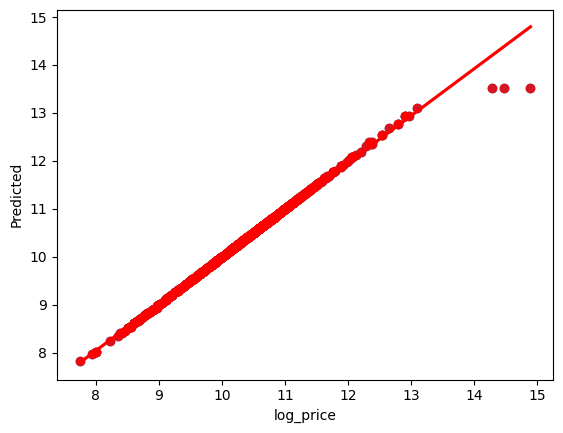

      Actual Value  Predicted Value  Difference
2580     10.239960        10.239960    0.000000
3660      8.682708         8.682708    0.000000
897      10.621327        10.621327    0.000000
2091     10.602865        10.601622    0.001243
1044     11.264451        11.264464   -0.000013
...            ...              ...         ...
283      10.896739        10.896739    0.000000
712      11.225243        11.225243    0.000000
274      11.050890        11.052476   -0.001586
2279     10.817776        10.817776    0.000000
621      10.239960        10.239960    0.000000

[802 rows x 3 columns]


In [16]:
# Results
results = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)
print(results)

# Identify the best model based on R2 score
best_model_name = results.iloc[0]['Model Name']
best_r2_score = results.iloc[0]['R2_Score'] * 100  # Convert R2 score to percentage

# Print the accuracy of the best model
print(f"Accuracy of the best model ({best_model_name}) is {best_r2_score:.2f}%")

# Train the best model again (if needed) and perform detailed analysis
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Plot y_pred and y_test
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
plt.show()

# Difference between Actual and Predicted Values
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
print(pred_df)